In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
# Testing the dataset 
path_single = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2.h5"
path_single_mask = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


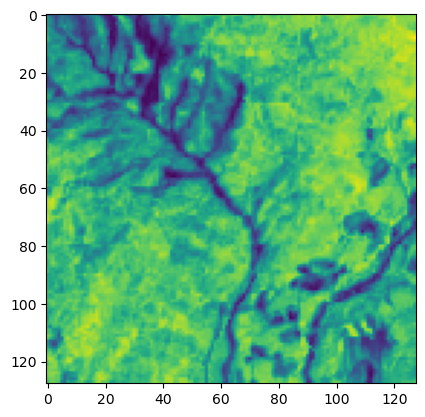

In [4]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


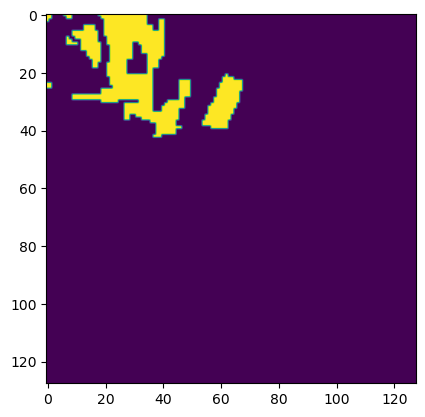

In [5]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [6]:
TRAIN_PATH = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\*.h5"
TRAIN_MASK = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [7]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1.h5
1 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_10.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_10.h5
2 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_100.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_100.h5
3 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1000.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1000.h5
4 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1001.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1001.h5
5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1002.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1002.h5
6 C:\shared doc\subjects\6th

69 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1060.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1060.h5
70 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1061.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1061.h5
71 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1062.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1062.h5
72 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1063.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1063.h5
73 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1064.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1064.h5
74 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1065.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1065.h5
75 C:\shar

133 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1118.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1118.h5
134 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1119.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1119.h5
135 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_112.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_112.h5
136 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1120.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1120.h5
137 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1121.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1121.h5
138 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1122.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1122.h5
139 C:

191 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1170.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1170.h5
192 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1171.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1171.h5
193 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1172.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1172.h5
194 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1173.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1173.h5
195 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1174.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1174.h5
196 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1175.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1175.h5
197 

249 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1222.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1222.h5
250 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1223.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1223.h5
251 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1224.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1224.h5
252 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1225.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1225.h5
253 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1226.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1226.h5
254 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1227.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1227.h5
255 

307 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1275.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1275.h5
308 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1276.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1276.h5
309 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1277.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1277.h5
310 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1278.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1278.h5
311 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1279.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1279.h5
312 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_128.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_128.h5
313 C:

365 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1327.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1327.h5
366 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1328.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1328.h5
367 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1329.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1329.h5
368 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_133.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_133.h5
369 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1330.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1330.h5
370 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1331.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1331.h5
371 C:

431 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1387.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1387.h5
432 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1388.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1388.h5
433 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1389.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1389.h5
434 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_139.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_139.h5
435 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1390.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1390.h5
436 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1391.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1391.h5
437 C:

484 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1434.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1434.h5
485 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1435.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1435.h5
486 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1436.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1436.h5
487 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1437.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1437.h5
488 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1438.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1438.h5
489 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1439.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1439.h5
490 

541 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1486.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1486.h5
542 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1487.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1487.h5
543 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1488.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1488.h5
544 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1489.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1489.h5
545 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_149.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_149.h5
546 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1490.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1490.h5
547 C:

600 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1539.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1539.h5
601 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_154.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_154.h5
602 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1540.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1540.h5
603 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1541.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1541.h5
604 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1542.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1542.h5
605 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1543.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1543.h5
606 C:

655 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1589.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1589.h5
656 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_159.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_159.h5
657 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1590.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1590.h5
658 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1591.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1591.h5
659 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1592.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1592.h5
660 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1593.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1593.h5
661 C:

709 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1637.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1637.h5
710 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1638.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1638.h5
711 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1639.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1639.h5
712 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_164.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_164.h5
713 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1640.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1640.h5
714 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1641.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1641.h5
715 C:

764 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1687.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1687.h5
765 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1688.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1688.h5
766 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1689.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1689.h5
767 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_169.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_169.h5
768 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1690.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1690.h5
769 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1691.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1691.h5
770 C:

817 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1734.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1734.h5
818 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1735.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1735.h5
819 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1736.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1736.h5
820 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1737.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1737.h5
821 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1738.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1738.h5
822 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1739.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1739.h5
823 

869 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1781.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1781.h5
870 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1782.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1782.h5
871 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1783.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1783.h5
872 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1784.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1784.h5
873 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1785.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1785.h5
874 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1786.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1786.h5
875 

919 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1826.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1826.h5
920 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1827.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1827.h5
921 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1828.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1828.h5
922 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1829.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1829.h5
923 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_183.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_183.h5
924 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1830.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1830.h5
925 C:

969 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1871.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1871.h5
970 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1872.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1872.h5
971 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1873.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1873.h5
972 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1874.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1874.h5
973 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1875.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1875.h5
974 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1876.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1876.h5
975 

1027 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1923.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1923.h5
1028 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1924.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1924.h5
1029 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1925.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1925.h5
1030 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1926.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1926.h5
1031 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1927.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1927.h5
1032 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1928.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1928.h

1083 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1974.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1974.h5
1084 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1975.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1975.h5
1085 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1976.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1976.h5
1086 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1977.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1977.h5
1087 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1978.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1978.h5
1088 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1979.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1979.h

1133 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2018.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2018.h5
1134 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2019.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2019.h5
1135 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_202.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_202.h5
1136 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2020.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2020.h5
1137 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2021.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2021.h5
1138 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2022.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2022.h5


1188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2068.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2068.h5
1189 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2069.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2069.h5
1190 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_207.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_207.h5
1191 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2070.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2070.h5
1192 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2071.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2071.h5
1193 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2072.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2072.h5


1243 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2117.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2117.h5
1244 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2118.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2118.h5
1245 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2119.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2119.h5
1246 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_212.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_212.h5
1247 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2120.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2120.h5
1248 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2121.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2121.h5


1297 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2166.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2166.h5
1298 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2167.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2167.h5
1299 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2168.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2168.h5
1300 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2169.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2169.h5
1301 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_217.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_217.h5
1302 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2170.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2170.h5


1357 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_222.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_222.h5
1358 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2220.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2220.h5
1359 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2221.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2221.h5
1360 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2222.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2222.h5
1361 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2223.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2223.h5
1362 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2224.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2224.h5


1416 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2273.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2273.h5
1417 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2274.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2274.h5
1418 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2275.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2275.h5
1419 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2276.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2276.h5
1420 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2277.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2277.h5
1421 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2278.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2278.h

1472 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2323.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2323.h5
1473 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2324.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2324.h5
1474 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2325.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2325.h5
1475 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2326.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2326.h5
1476 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2327.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2327.h5
1477 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2328.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2328.h

1527 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2373.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2373.h5
1528 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2374.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2374.h5
1529 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2375.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2375.h5
1530 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2376.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2376.h5
1531 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2377.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2377.h5
1532 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2378.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2378.h

1586 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2426.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2426.h5
1587 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2427.h5
1588 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2428.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2428.h5
1589 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2429.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2429.h5
1590 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_243.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_243.h5
1591 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2430.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2430.h5


1649 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2483.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2483.h5
1650 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2484.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2484.h5
1651 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2485.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2485.h5
1652 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2486.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2486.h5
1653 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2487.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2487.h5
1654 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2488.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2488.h

C:\Users\nigel\AppData\Local\Temp\ipykernel_17432\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1681 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2511.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2511.h5
1682 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2512.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2512.h5
1683 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2513.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2513.h5
1684 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2514.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2514.h5
1685 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2515.h5
1686 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2516.h

1746 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2570.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2570.h5
1747 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2571.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2571.h5
1748 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2572.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2572.h5
1749 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2573.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2573.h5
1750 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2574.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2574.h5
1751 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2575.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2575.h

1800 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2619.h5
1801 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_262.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_262.h5
1802 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2620.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2620.h5
1803 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2621.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2621.h5
1804 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2622.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2622.h5
1805 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2623.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2623.h5


1856 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_267.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_267.h5
1857 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2670.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2670.h5
1858 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2671.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2671.h5
1859 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2672.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2672.h5
1860 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2673.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2673.h5
1861 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2674.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2674.h5


1907 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2715.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2715.h5
1908 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2716.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2716.h5
1909 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2717.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2717.h5
1910 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2718.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2718.h5
1911 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2719.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2719.h5
1912 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_272.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_272.h5


1963 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2766.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2766.h5
1964 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2767.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2767.h5
1965 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2768.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2768.h5
1966 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2769.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2769.h5
1967 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_277.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_277.h5
1968 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2770.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2770.h5


2024 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2820.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2820.h5
2025 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2821.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2821.h5
2026 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2822.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2822.h5
2027 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2823.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2823.h5
2028 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2824.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2824.h5
2029 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2825.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2825.h

2083 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2874.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2874.h5
2084 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2875.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2875.h5
2085 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2876.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2876.h5
2086 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2877.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2877.h5
2087 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2878.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2878.h5
2088 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2879.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2879.h

2134 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_292.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_292.h5
2135 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2920.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2920.h5
2136 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2921.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2921.h5
2137 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2922.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2922.h5
2138 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2923.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2923.h5
2139 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2924.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2924.h5


2184 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2965.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2965.h5
2185 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2966.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2966.h5
2186 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2967.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2967.h5
2187 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2968.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2968.h5
2188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2969.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2969.h5
2189 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_297.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_297.h5


2237 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3011.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3011.h5
2238 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3012.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3012.h5
2239 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3013.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3013.h5
2240 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3014.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3014.h5
2241 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3015.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3015.h5
2242 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3016.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3016.h

C:\Users\nigel\AppData\Local\Temp\ipykernel_17432\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2269 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3040.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3040.h5
2270 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3041.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3041.h5
2271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3042.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3042.h5
2272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3043.h5
2273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3044.h5
2274 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3045.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3045.h

2321 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3088.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3088.h5
2322 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3089.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3089.h5
2323 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_309.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_309.h5
2324 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3090.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3090.h5
2325 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3091.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3091.h5
2326 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3092.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3092.h5


2372 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3133.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3133.h5
2373 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3134.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3134.h5
2374 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3135.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3135.h5
2375 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3136.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3136.h5
2376 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3137.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3137.h5
2377 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3138.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3138.h

2428 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3184.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3184.h5
2429 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3185.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3185.h5
2430 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3186.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3186.h5
2431 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3187.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3187.h5
2432 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3188.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3188.h5
2433 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3189.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3189.h

2480 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3230.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3230.h5
2481 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3231.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3231.h5
2482 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3232.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3232.h5
2483 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3233.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3233.h5
2484 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3234.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3234.h5
2485 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3235.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3235.h

2533 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3279.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3279.h5
2534 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_328.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_328.h5
2535 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3280.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3280.h5
2536 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3281.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3281.h5
2537 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3282.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3282.h5
2538 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3283.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3283.h5


2585 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3325.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3325.h5
2586 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3326.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3326.h5
2587 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3327.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3327.h5
2588 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3328.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3328.h5
2589 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3329.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3329.h5
2590 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_333.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_333.h5


2639 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3374.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3374.h5
2640 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3375.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3375.h5
2641 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3376.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3376.h5
2642 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3377.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3377.h5
2643 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3378.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3378.h5
2644 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3379.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3379.h

2694 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3423.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3423.h5
2695 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3424.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3424.h5
2696 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3425.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3425.h5
2697 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3426.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3426.h5
2698 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3427.h5
2699 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3428.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3428.h

2745 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_347.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_347.h5
2746 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3470.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3470.h5
2747 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3471.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3471.h5
2748 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3472.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3472.h5
2749 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3473.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3473.h5
2750 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3474.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3474.h5


2796 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3515.h5
2797 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3516.h5
2798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3517.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3517.h5
2799 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3518.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3518.h5
2800 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3519.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3519.h5
2801 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_352.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_352.h5


2850 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3564.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3564.h5
2851 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3565.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3565.h5
2852 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3566.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3566.h5
2853 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3567.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3567.h5
2854 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3568.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3568.h5
2855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3569.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3569.h

2901 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_361.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_361.h5
2902 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3610.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3610.h5
2903 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3611.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3611.h5
2904 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3612.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3612.h5
2905 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3613.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3613.h5
2906 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3614.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3614.h5


2951 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3655.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3655.h5
2952 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3656.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3656.h5
2953 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3657.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3657.h5
2954 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3658.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3658.h5
2955 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3659.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3659.h5
2956 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_366.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_366.h5


3002 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3700.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3700.h5
3003 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3701.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3701.h5
3004 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3702.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3702.h5
3005 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3703.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3703.h5
3006 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3704.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3704.h5
3007 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3705.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3705.h

3056 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_375.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_375.h5
3057 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3750.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3750.h5
3058 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3751.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3751.h5
3059 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3752.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3752.h5
3060 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3753.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3753.h5
3061 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3754.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3754.h5


3108 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3797.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3797.h5
3109 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3798.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3798.h5
3110 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3799.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3799.h5
3111 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_38.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_38.h5
3112 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_380.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_380.h5
3113 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_381.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_381.h5
3114 C

3160 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_423.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_423.h5
3161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_424.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_424.h5
3162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_425.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_425.h5
3163 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_426.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_426.h5
3164 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_427.h5
3165 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_428.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_428.h5
3166 C:\sh

3211 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_47.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_47.h5
3212 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_470.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_470.h5
3213 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_471.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_471.h5
3214 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_472.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_472.h5
3215 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_473.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_473.h5
3216 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_474.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_474.h5
3217 C:\shar

3264 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_517.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_517.h5
3265 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_518.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_518.h5
3266 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_519.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_519.h5
3267 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_52.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_52.h5
3268 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_520.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_520.h5
3269 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_521.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_521.h5
3270 C:\shar

3318 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_566.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_566.h5
3319 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_567.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_567.h5
3320 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_568.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_568.h5
3321 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_569.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_569.h5
3322 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_57.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_57.h5
3323 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_570.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_570.h5
3324 C:\shar

3372 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_614.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_614.h5
3373 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_615.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_615.h5
3374 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_616.h5
3375 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_617.h5
3376 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_618.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_618.h5
3377 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_619.h5
3378 C:\sh

3423 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_660.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_660.h5
3424 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_661.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_661.h5
3425 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_662.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_662.h5
3426 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_663.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_663.h5
3427 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_664.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_664.h5
3428 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_665.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_665.h5
3429 C:\sh

3474 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_706.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_706.h5
3475 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_707.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_707.h5
3476 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_708.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_708.h5
3477 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_709.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_709.h5
3478 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_71.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_71.h5
3479 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_710.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_710.h5
3480 C:\shar

3529 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_756.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_756.h5
3530 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_757.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_757.h5
3531 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_758.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_758.h5
3532 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_759.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_759.h5
3533 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_76.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_76.h5
3534 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_760.h5
3535 C:\shar

3581 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_802.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_802.h5
3582 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_803.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_803.h5
3583 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_804.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_804.h5
3584 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_805.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_805.h5
3585 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_806.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_806.h5
3586 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_807.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_807.h5
3587 C:\sh

3633 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_85.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_85.h5
3634 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_850.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_850.h5
3635 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_851.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_851.h5
3636 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_852.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_852.h5
3637 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_853.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_853.h5
3638 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_854.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_854.h5
3639 C:\shar

3687 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_899.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_899.h5
3688 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_9.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_9.h5
3689 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_90.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_90.h5
3690 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_900.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_900.h5
3691 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_901.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_901.h5
3692 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_902.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_902.h5
3693 C:\shared d

3740 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_946.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_946.h5
3741 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_947.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_947.h5
3742 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_948.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_948.h5
3743 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_949.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_949.h5
3744 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_95.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_95.h5
3745 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_950.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_950.h5
3746 C:\shar

3793 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_994.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_994.h5
3794 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_995.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_995.h5
3795 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_996.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_996.h5
3796 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_997.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_997.h5
3797 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_998.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_998.h5
3798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_999.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_999.h5


In [8]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


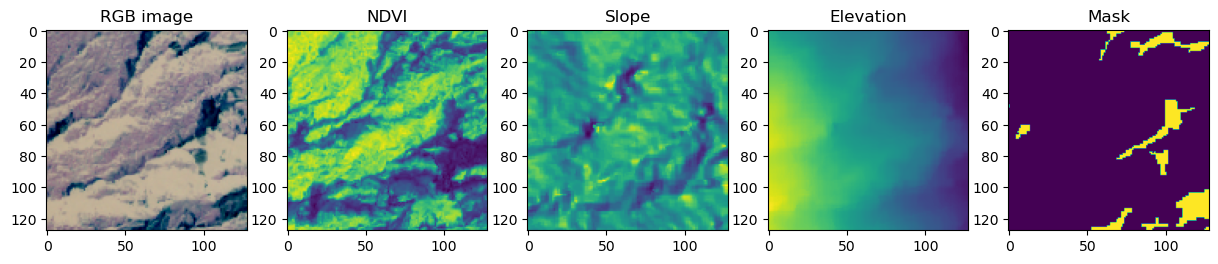

In [9]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.4, shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


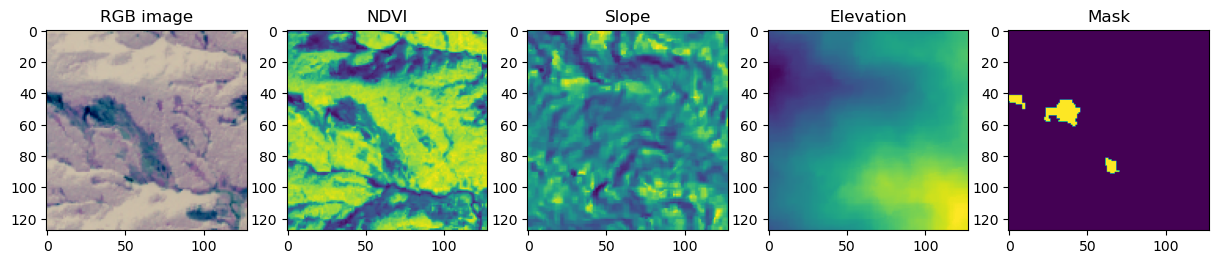

In [11]:
img=1550
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [12]:
x_train.shape, y_train.shape

((2279, 128, 128, 6), (2279, 128, 128, 1))

In [15]:
import sys
sys.path.append(r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\utils\utils.py")

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose, SeparableConv2D
from tensorflow.keras.callbacks import ModelCheckpoint
from utils import recall_m, precision_m, f1_m

def u2net_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = SeparableConv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = SeparableConv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = SeparableConv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = SeparableConv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = SeparableConv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = SeparableConv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = SeparableConv2D(128, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = SeparableConv2D(256, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = SeparableConv2D(256, (3, 3), activation='relu', padding='same')(c5)

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = SeparableConv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = SeparableConv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = SeparableConv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = SeparableConv2D(64, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = SeparableConv2D(32, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = SeparableConv2D(32, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = SeparableConv2D(16, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = SeparableConv2D(16, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

In [17]:
model = u2net_model(128, 128, 6)

# Define paths
model_checkpoint_path = r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_u2net.h5.keras"
model_save_path = "model_save.h5"

# ModelCheckpoint callback
checkpointer = ModelCheckpoint(model_checkpoint_path, monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

# Training
history = model.fit(x_train, y_train, batch_size=16,  
                    epochs=40,
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpointer])

# Save the model
model.save(model_save_path)


Epoch 1/40

Epoch 1: val_f1_m improved from -inf to 0.00000, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_u2net.h5.keras
143/143 - 81s - 564ms/step - accuracy: 0.9739 - f1_m: 2.3473e-04 - loss: 0.2253 - precision_m: 2.9952e-04 - recall_m: 0.0038 - val_accuracy: 0.9786 - val_f1_m: 0.0000e+00 - val_loss: 0.0623 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/40

Epoch 2: val_f1_m improved from 0.00000 to 0.28540, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_u2net.h5.keras
143/143 - 60s - 417ms/step - accuracy: 0.9770 - f1_m: 0.0269 - loss: 0.0573 - precision_m: 0.1403 - recall_m: 0.0183 - val_accuracy: 0.9815 - val_f1_m: 0.2854 - val_loss: 0.0452 - val_precision_m: 0.7952 - val_recall_m: 0.1772
Epoch 3/40

Epoch 3: val_f1_m improved from 0.28540 to 0.39511, saving model to C:\shared doc\s

Epoch 23/40

Epoch 23: val_f1_m improved from 0.66299 to 0.66401, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_u2net.h5.keras
143/143 - 55s - 385ms/step - accuracy: 0.9866 - f1_m: 0.6530 - loss: 0.0345 - precision_m: 0.7683 - recall_m: 0.5831 - val_accuracy: 0.9873 - val_f1_m: 0.6640 - val_loss: 0.0322 - val_precision_m: 0.7149 - val_recall_m: 0.6294
Epoch 24/40

Epoch 24: val_f1_m improved from 0.66401 to 0.68154, saving model to C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_u2net.h5.keras
143/143 - 54s - 378ms/step - accuracy: 0.9869 - f1_m: 0.6609 - loss: 0.0334 - precision_m: 0.7761 - recall_m: 0.5853 - val_accuracy: 0.9876 - val_f1_m: 0.6815 - val_loss: 0.0319 - val_precision_m: 0.7067 - val_recall_m: 0.6660
Epoch 25/40

Epoch 25: val_f1_m did not improve from 0.68154
143/143 - 54s - 376ms/step - accuracy: 0.9869 -

In [18]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03117305599153042 0.9875636100769043 0.6698561310768127 0.7604848742485046 0.6062018275260925


In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set (assuming model has already been trained)
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

# Calculate Mean Average Precision (mAP)
# Assuming y_test_binary and y_pred_binary are in the right shape for mAP calculation
n_classes = y_test.shape[-1]  # Number of classes
average_precisions = []
for i in range(n_classes):
    average_precisions.append(average_precision_score(y_test_binary[:, :, i].flatten(), y_pred_binary[:, :, i].flatten()))

mAP = np.mean(average_precisions)

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)
print("mAP:", mAP)


24/24 - 3s - 118ms/step - accuracy: 0.9872 - f1_m: 0.7042 - loss: 0.0323 - precision_m: 0.8117 - recall_m: 0.6254
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step
Test Metrics:
Loss: [0.032289594411849976, 0.9872221946716309, 0.7042173743247986, 0.8117004036903381, 0.6253819465637207]
F1 Score: 0.986440445237554
Precision: 0.9862380320310984
Recall: 0.9872222097296464
IOU: 0.551840303304293
mAP: 0.41846171535843285


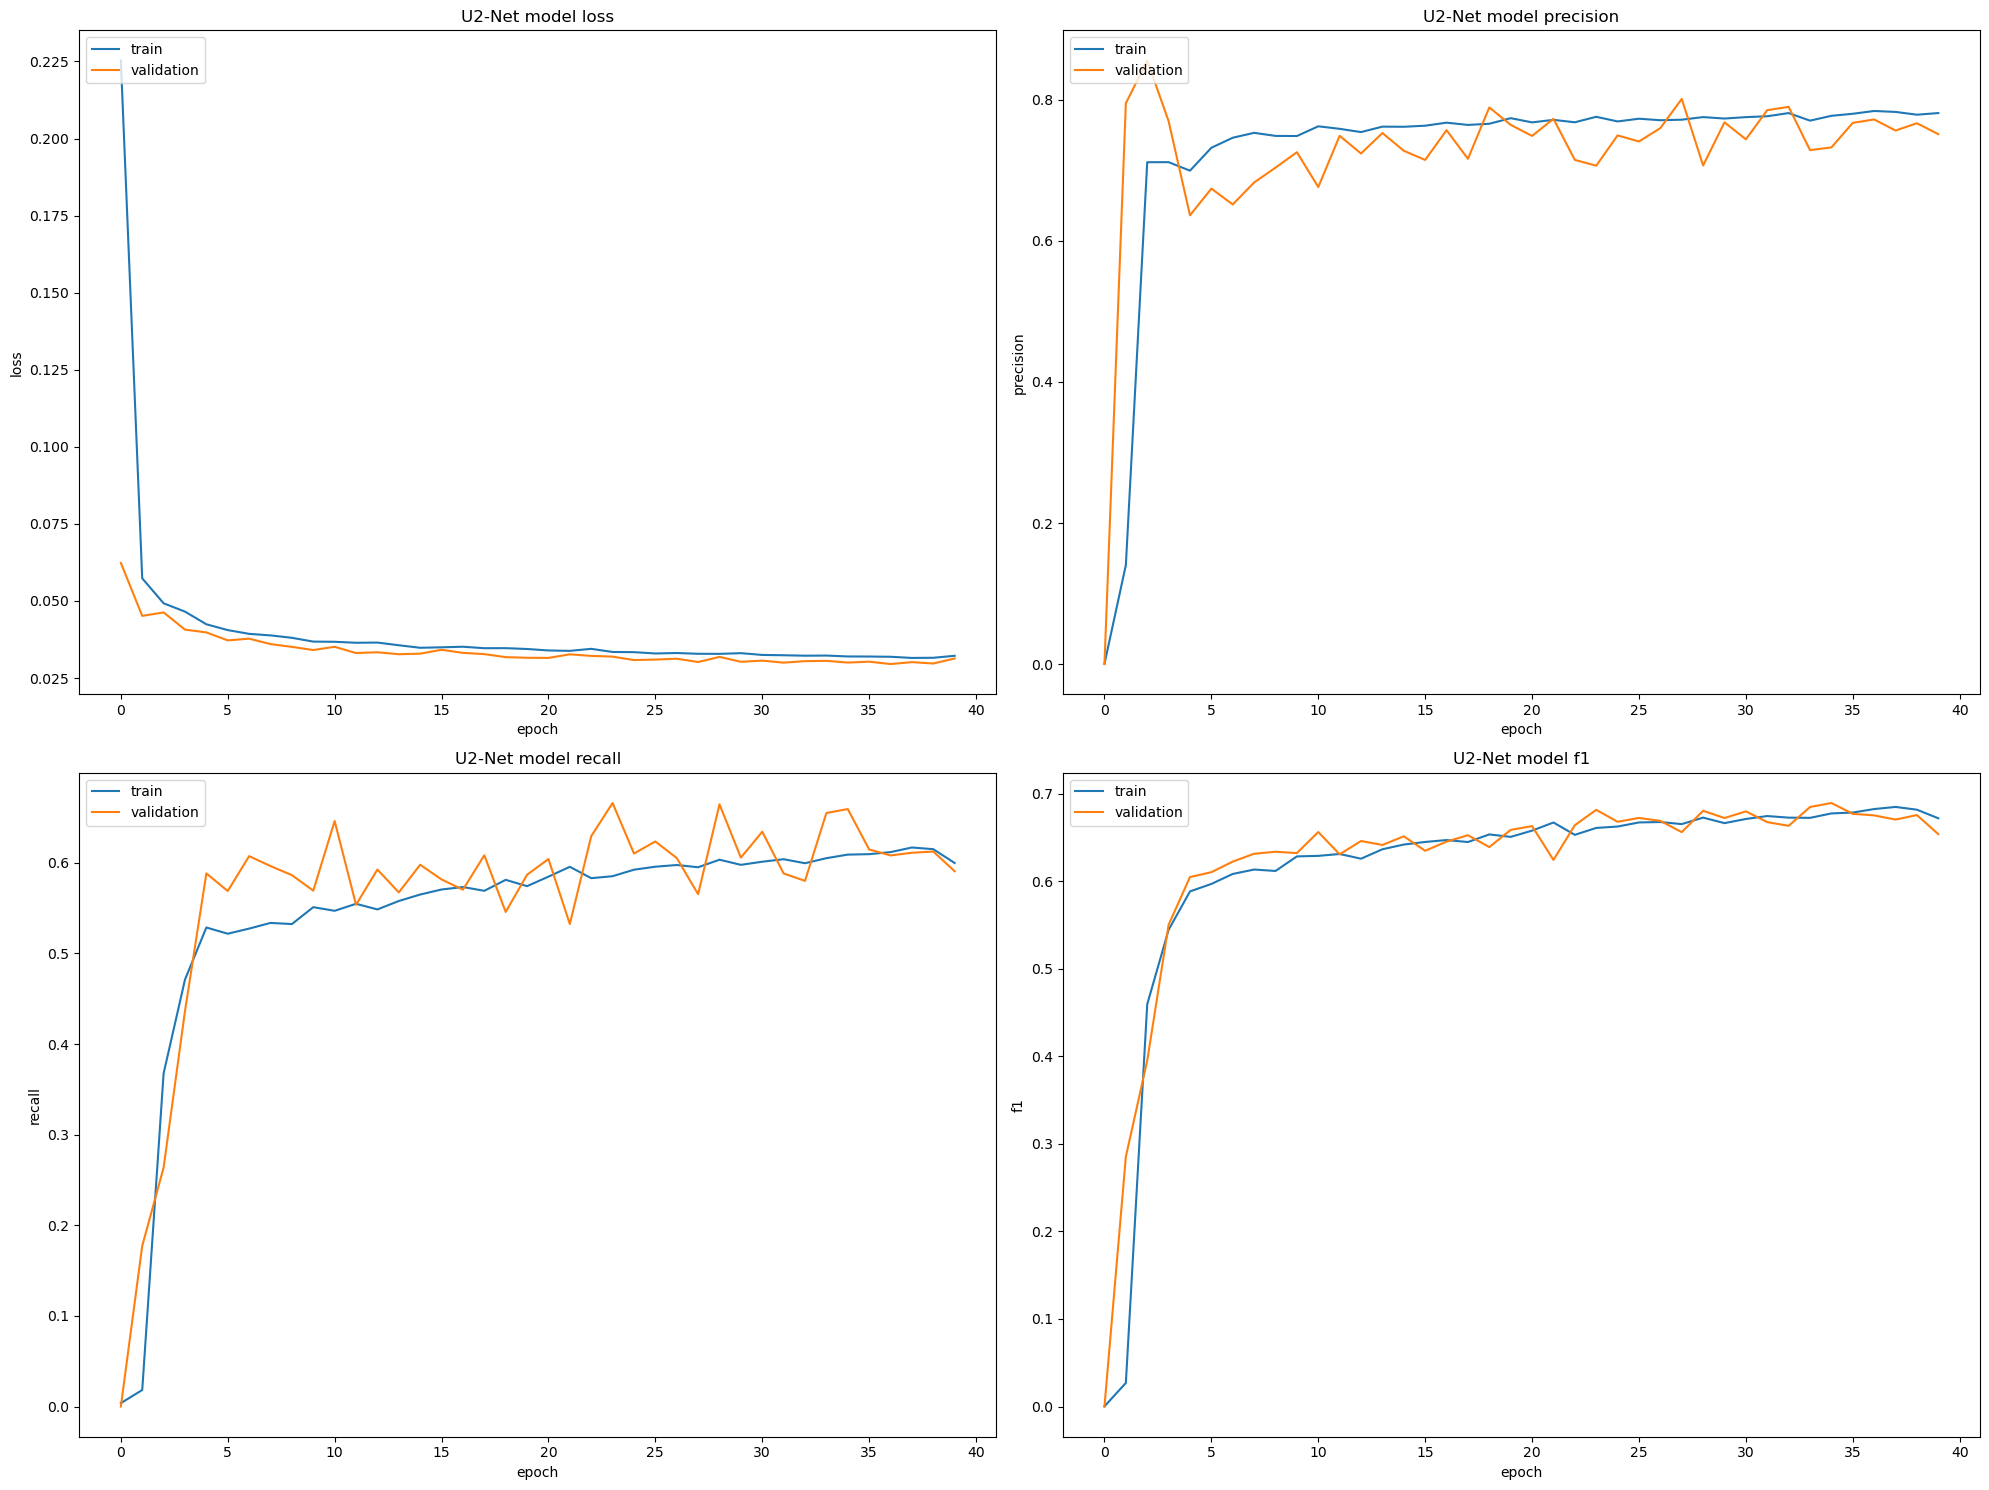

In [20]:
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.set_title('U2-Net model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('U2-Net model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('U2-Net model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('U2-Net model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


Text(0.5, 1.0, 'Training Image')

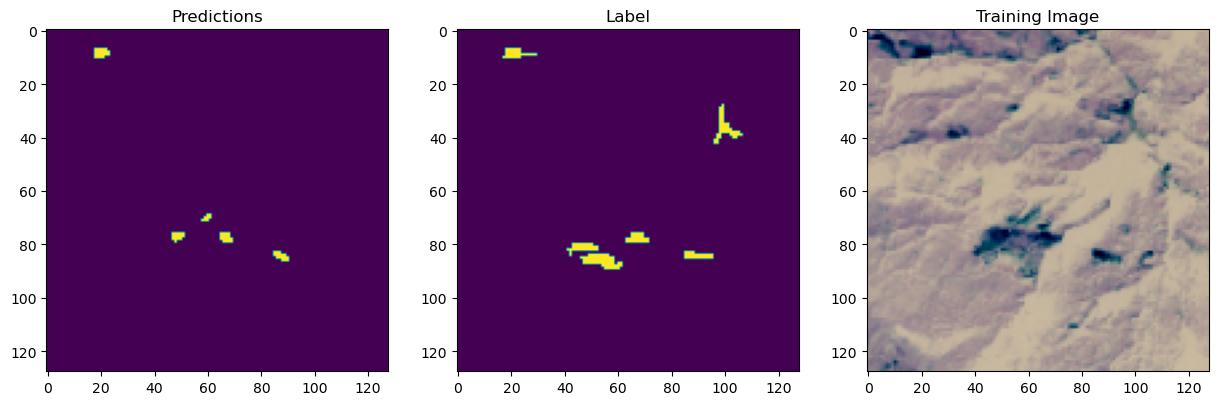

In [43]:
img = 138
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


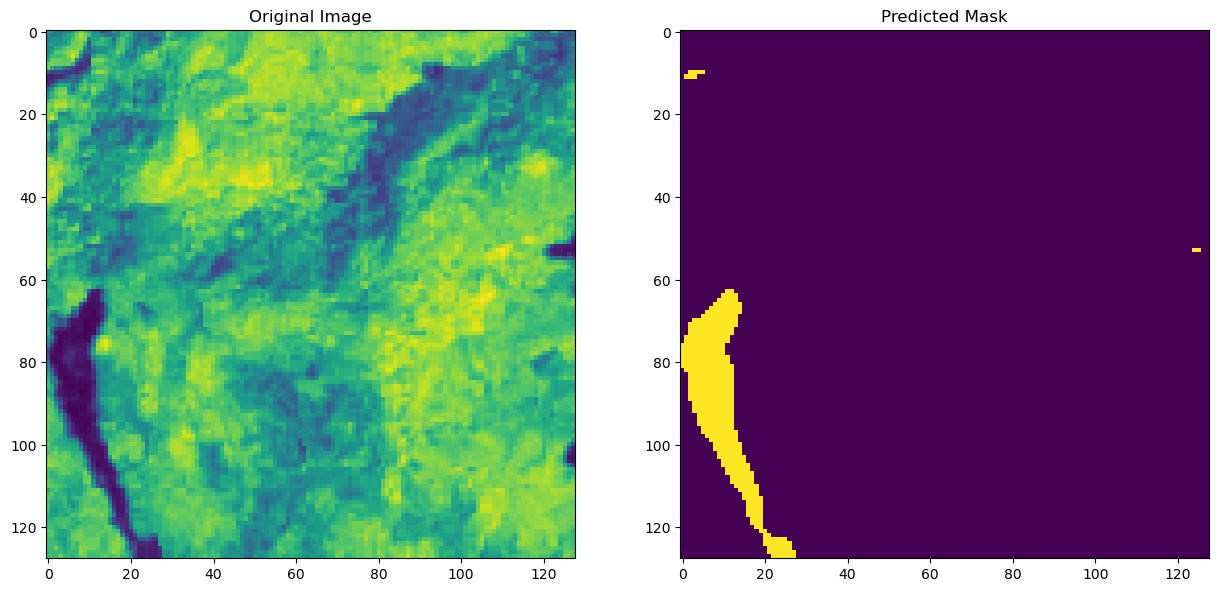

In [87]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Load the model
def preprocess_image(image_path):
    with h5py.File(image_path, 'r') as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        denominator = np.add(data_nir, data_red)
        data_ndvi = np.zeros_like(data_red)
        non_zero_indices = denominator != 0
        data_ndvi[non_zero_indices] = np.divide(data_nir[non_zero_indices] - data_red[non_zero_indices], denominator[non_zero_indices])
        processed_image = np.zeros((1, 128, 128, 6))
        processed_image[0, :, :, 0] = 1 - data[:, :, 3] / mid_rgb
        processed_image[0, :, :, 1] = 1 - data[:, :, 2] / mid_rgb
        processed_image[0, :, :, 2] = 1 - data[:, :, 1] / mid_rgb
        processed_image[0, :, :, 3] = data_ndvi
        processed_image[0, :, :, 4] = 1 - data[:, :, 13] / mid_slope
        processed_image[0, :, :, 5] = 1 - data[:, :, 13] / mid_elevation
    return processed_image

def plot_prediction(image_path, model):
    
    with h5py.File(image_path) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))
        data_red = data[:, :, 3]
        data_green = data[:, :, 2]
        data_blue = data[:, :, 1]
        data_nir = data[:, :, 7]
        data_rgb = data[:, :, 3:0:-1]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        f_data[0, :, :, 0] =data_ndvi
        f_data[0, :, :, 1] = data[:, :, 12]
        f_data[0, :, :, 2] = data[:, :, 13]

    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    threshold = 0.5
    binary_prediction = (prediction > threshold).astype(np.uint8)
    
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    ax1.imshow(data_ndvi)
    ax1.set_title('Original Image')
    ax2.imshow(binary_prediction[0, :, :, 0])
    ax2.set_title("Predicted Mask")
    plt.show()

# Example usage
image_path = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TestData\img\image_752.h5"  # Replace 'path_to_your_image.h5' with the path to your image file
plot_prediction(image_path, model)